### 1.simulate data for A/B test

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Set seed for reproducibility
np.random.seed(42)

In [8]:
# Simulate traffic and conversions
n_A, p_A = 10000, 0.10  # Variant A: 10% true conversion rate
n_B, p_B = 10000, 0.12  # Variant B: 12% true conversion rate

In [5]:
# Simulate purchases using binomial distribution
success_A = np.random.binomial(n_A, p_A)
success_B = np.random.binomial(n_B, p_B)

In [7]:
# Calculate conversion rate and 95% confidence intervals
def proportion_ci(successes, n, alpha=0.05):
    p_hat = successes / n
    z = stats.norm.ppf(1 - alpha / 2)
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    return p_hat, p_hat - z * se, p_hat + z * se

p_hat_A, ci_lower_A, ci_upper_A = proportion_ci(success_A, n_A)
p_hat_B, ci_lower_B, ci_upper_B = proportion_ci(success_B, n_B)

In [9]:
# Prepare results in a DataFrame
result = pd.DataFrame({
    'Variant': ['A', 'B'],
    'Visitors': [n_A, n_B],
    'Conversions': [success_A, success_B],
    'Conversion Rate (%)': [p_hat_A * 100, p_hat_B * 100],
    'CI Lower (%)': [ci_lower_A * 100, ci_lower_B * 100],
    'CI Upper (%)': [ci_upper_A * 100, ci_upper_B * 100]
})
print(result)

  Variant  Visitors  Conversions  Conversion Rate (%)  CI Lower (%)  \
0       A     10000          973                 9.73      9.149134   
1       B     10000         1134                11.34     10.718532   

   CI Upper (%)  
0     10.310866  
1     11.961468  


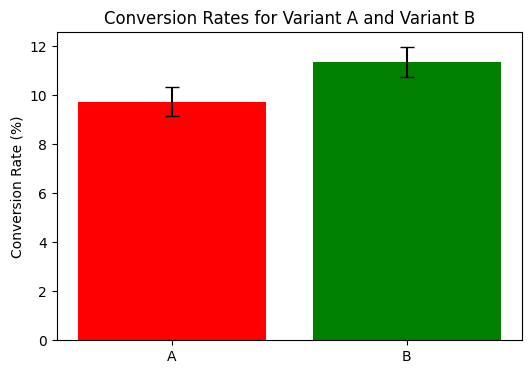

In [20]:
plt.figure(figsize=(6, 4))
plt.bar(result['Variant'],
        result['Conversion Rate (%)'],
        yerr=[
            result['Conversion Rate (%)'] - result['CI Lower (%)'],  # lower error bars
            result['CI Upper (%)'] - result['Conversion Rate (%)']   # upper error bars
        ],
        capsize=5,
        color=['red', 'green'])
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rates for Variant A and Variant B')
plt.show()

### 2. proportion Z test

In [21]:
z_stat, p_value = proportions_ztest([success_B, success_A], [n_B, n_A], alternative='larger')

print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")


Z-statistic: 3.7082
P-value: 0.0001


In [23]:
if p_value < 0.05:
    print("Funnel B is statistically significantly better than Funnel A (at 5% significance level).")
else:
    print("No significant improvement observed in Funnel B over Funnel A.")

Funnel B is statistically significantly better than Funnel A (at 5% significance level).


Conclusion
Funnel B shows a statistically significant improvement in conversion rate over Funnel A. The business can consider rolling out Funnel B more broadly, but should continue real-time monitoring to ensure consistent performance.
